##**TP2633 PROJECT: MOVIE SENTIMENT ANALYSIS**
Group Members:


1.   Ng Xin Yen (A189439)
2.   Lee Jia Yee (A187581)

## **Task 1: Data Collection**

Get data from RottonTomatoes: Barbie

https://www.rottentomatoes.com/m/barbie/reviews



In [ ]:
!pip install requests

In [ ]:
!pip install langid

In [ ]:
!pip install googletrans

In [ ]:
!pip install langdetect

We retrieve user reviews and sentiment labels for **Barbie** movie from Rotten Tomatoes API.  Firstly, we utilize the `requests` library to send HTTP requests and the `json` library to handle JSON responses. The API URLs are stored in a list `API_URL`. The code iterates through each URL, retrieves the reviews and their corresponding ratings, and appends the unescaped review quotes to the `reviews` list. Then, sentiment labels (`pos`, `neg`, or `neutral`) are assigned based on the review ratings. These labels are stored in the `labels` list.

In [ ]:
import requests, json
import html

reviews = []
labels = []
# Get API URL from documentation
API_URL=[
    'https://www.rottentomatoes.com/napi/movie/317d7155-533b-396f-8c1c-34a22e2e8ef9/reviews/user?after=eyJyZWFsbV91c2VySWQiOiJSVF8xYWVmN2U1Mi1hMWQ1LTQ4YmQtOWI5ZC1jZjVmYjNkNWE5NGQiLCJlbXNJZCI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOV9UIiwiY3JlYXRlRGF0ZSI6IjIwMjQtMDEtMDRUMDE6MDA6MDEuNzk5WiJ9&pageCount=500',
    'https://www.rottentomatoes.com/napi/movie/317d7155-533b-396f-8c1c-34a22e2e8ef9/reviews/user?after=eyJyZWFsbV91c2VySWQiOiJSVF81YjRjNDE4MC1jODU4LTQ2NWUtYTFiYS0wOTIwNWVmZjg1M2IiLCJlbXNJZCI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOV9UIiwiY3JlYXRlRGF0ZSI6IjIwMjMtMTAtMTVUMTQ6MzI6MDAuNDU3WiJ9&pageCount=500',
    'https://www.rottentomatoes.com/napi/movie/317d7155-533b-396f-8c1c-34a22e2e8ef9/reviews/user?after=eyJyZWFsbV91c2VySWQiOiJSVF85YzEzNjY5ZS1hOGFkLTQwNjMtODhjMS1iYzg0NWI0YTk0NGQiLCJlbXNJZCI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOV9UIiwiY3JlYXRlRGF0ZSI6IjIwMjMtMDktMTJUMDQ6MzE6MDcuNzEyWiJ9&pageCount=500',
    'https://www.rottentomatoes.com/napi/movie/317d7155-533b-396f-8c1c-34a22e2e8ef9/reviews/user?after=eyJyZWFsbV91c2VySWQiOiJSVF82YmIwMWYxZi1kMjgzLTRhMTQtYTg5Yy1mMTYxNTNkNDExN2MiLCJlbXNJZCI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOV9UIiwiY3JlYXRlRGF0ZSI6IjIwMjMtMDgtMjlUMTA6MjE6MTYuNDgwWiJ9&pageCount=500',
    'https://www.rottentomatoes.com/napi/movie/317d7155-533b-396f-8c1c-34a22e2e8ef9/reviews/user?after=eyJyZWFsbV91c2VySWQiOiJGYW5kYW5nb18yMGUzYTc2NS1jMGMxLTRjMDQtOWZiNi0wMmEyZWZkMWM3ODciLCJlbXNJZCI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOV9UIiwiY3JlYXRlRGF0ZSI6IjIwMjMtMDgtMTNUMDE6Mjg6MTcuOTAzWiJ9&pageCount=500',
    'https://www.rottentomatoes.com/napi/movie/317d7155-533b-396f-8c1c-34a22e2e8ef9/reviews/user?after=eyJyZWFsbV91c2VySWQiOiJSVF8xMjMxNWRjOC0xNTFkLTRkNWEtOWJjNy1lMjRjYzRhZmQ2NjgiLCJlbXNJZCI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjMxN2Q3MTU1LTUzM2ItMzk2Zi04YzFjLTM0YTIyZTJlOGVmOV9UIiwiY3JlYXRlRGF0ZSI6IjIwMjMtMDgtMThUMDA6MDQ6MzUuNzk3WiJ9&pageCount=500'
    ''
    ]

for i in range(len(API_URL)):
  response = json.loads(requests.get(API_URL[i]).text)
  print(response['reviews'])

  for i in range(len(response['reviews'])):
    reviews.append(html.unescape(response['reviews'][i]['quote']))
    label = ""
    if response['reviews'][i]['rating']>3:
      label = 'pos'
    elif response['reviews'][i]['rating']<3:
      label = 'neg'
    else:
      label = 'neutral'

    labels.append(label)

[{'rating': 0.5, 'quote': 'My husband fell asleep and I suffered through it to finish it.  Very predictable and America was the only one worth watching... but even she was over the top.', 'reviewId': '06b31f37-3566-4518-92e0-d8758284abee', 'isVerified': False, 'isSuperReviewer': False, 'hasSpoilers': False, 'hasProfanity': False, 'score': 0.5, 'creationDate': 'Jan 4, 2024', 'userAccountLink': '/profiles/ZOGTDaCgQuGbuLQsNvFXWHXMcDDC6zTPQs9qTobIRRCKJiPwcxzuLWUGGClpIWJumXuJbseeCNwFawTJpHdbCBATgeIDWCNZie0CaLIlOued', 'userDisplayName': 'Karie V', 'userRealm': 'RT', 'userId': '5dbfe90c-fa57-4c8b-ab81-c50e57e4ea83'}, {'rating': 3.5, 'quote': 'Being a man of 60, I have to say that I did not like Barbie.\n\nBut, being a man of 60 with a beautiful daughter and three granddaughters, I appreciate anything that might help me to connect better with them. One day, I hope to watch Barbie with all of them and, no matter how bad the movie might seem, it will be a worthwhile watch just to see and hear th

In [ ]:
labels

['neg',
 'pos',
 'neutral',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neutral',
 'pos',
 'pos',
 'neutral',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neutral',
 'pos',
 'neg',
 'neutral',
 'neg',
 'neutral',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neutral',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neutral',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neutral',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neutral',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neutral',
 'pos',
 'pos',
 'neutral',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neutral',
 'ne

In [ ]:
reviews

['My husband fell asleep and I suffered through it to finish it.  Very predictable and America was the only one worth watching... but even she was over the top.',
 'Being a man of 60, I have to say that I did not like Barbie.\n\nBut, being a man of 60 with a beautiful daughter and three granddaughters, I appreciate anything that might help me to connect better with them. One day, I hope to watch Barbie with all of them and, no matter how bad the movie might seem, it will be a worthwhile watch just to see and hear the smiles and laughter among my girls.',
 "Understandably, the media was abuzz with news of the movie's massive box-office success. \nThe marketing hype had led viewers to believe that the film would be exceptional, and that generated significant expectations for some. \nHowever, upon watching it, I felt disappointed. The movie fell short of being either profound or superficial, and instead, it remained somewhere in the close of good. \n\nIt's a reminder that not everything t

In [ ]:
# See number of reviews collected
len(reviews)

3000

In [ ]:
# export reviews to csv
import pandas as pd

review_df = pd.DataFrame(reviews, columns=['review'])
review_df['label'] = labels
print(review_df)
review_df.to_csv('reviews.csv',index=False)

                                                 review    label
0     My husband fell asleep and I suffered through ...      neg
1     Being a man of 60, I have to say that I did no...      pos
2     Understandably, the media was abuzz with news ...  neutral
3               Best movie ever, highly not recommended      pos
4     At first I was like meh a Barbie movie how goo...      pos
...                                                 ...      ...
2995  That was a real stinker. I am not sure how tha...      neg
2996  Incredible movie making so many connections to...      pos
2997  My new favorite movie. I have watched it 3 times.      pos
2998  We likes the message of the movie. The plot co...      pos
2999  Interested movie !\nI never thought I would le...      pos

[3000 rows x 2 columns]


## **Task 2: Data preprocessing**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set default figure size for seaborn plots to 0 inches wide and 1 inch tall
sns.set(rc={'figure.figsize':(30,1)})

# Create heatmap using seaborn with the transposed DataFrame
def visualise_sentiments(data):
  return sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")


Import essential libraries and download resources for data preprocessing

In [ ]:
#To import and download nltk
import nltk
import pandas as pd

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

import string
import re
import numpy as np
import googletrans
from googletrans import Translator
from langdetect import detect
from collections import Counter

stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

The `langdetect` library is used to identify the language of sentences in the dataset.<br>
Detected languages are stored in the `lang_array` set, using unique language codes.

In [ ]:
from langdetect import detect
lang_array=set()
for i in reviews:
  sentence = i
  try:
    lang_array.add(detect(sentence))
  except:
    continue

print(lang_array)

{'tl', 'uk', 'nl', 'cy', 'pl', 'ru', 'so', 'ar', 'da', 'it', 'pt', 'en', 'lv', 'tr', 'et', 'fr', 'no', 'af', 'ko', 'id', 'ur', 'ro', 'ca', 'fa', 'es', 'vi', 'de'}


In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
from googletrans import Translator

The function `translate_en` use `langid.classify` to check the language of the sentence.  If the detected language is not English (`en`), it translates the sentence to English using `googletrans` library.

In [ ]:
import langid
translator = Translator()

def translate_en(sentence):
  if (langid.classify(sentence)[0] != 'en'):
      sentence = translator.translate(sentence, dest='en').text

  return sentence

for i in range(len(reviews)):
  reviews[i] = translate_en(reviews[i])


The `clean` function performs several text cleaning and normalization steps.


1.   Use regular expressions to **remove URL links** from the document
2.   **Removes digits** and non-alphabetic characters (**punctuation**) from the document
3.   Convert the document to **lowercase** and **remove stopwords** such as 'a', 'and', 'the'
4.   **Lemmatize** the remaining words using the WordNet Lemmatizer

Finally, the function will return a list of cleaned and lemmatized words.


In [ ]:
stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def clean(doc):
    # Remove URL links
    doc = re.sub(r"http\S+|www\S+|https\S+", "", doc, flags=re.MULTILINE)

    # Remove digits and punctuation
    doc = re.sub(r"\d+|[^a-zA-Z\s]", "", doc)

    # Remove stopwords
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])

    #Lemmatize words
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    y = normalized.split()
    return y

Create a list of cleaned sentences

In [ ]:
cleaned_sentences = []
for line in reviews:
    line = line.strip()
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    cleaned_sentences.append(cleaned)

cleaned_sentences

['husband fell asleep suffered finish predictable america one worth watching even top',
 'man say like barbie man beautiful daughter three granddaughter appreciate anything might help connect better one day hope watch barbie matter bad movie might seem worthwhile watch see hear smile laughter among girl',
 'understandably medium abuzz news movie massive boxoffice success marketing hype led viewer believe film would exceptional generated significant expectation however upon watching felt disappointed movie fell short either profound superficial instead remained somewhere close good reminder everything gain widespread attention internet necessarily fantastic',
 'best movie ever highly recommended',
 'first like meh barbie movie good awesome humour point message deep never would thought barbie movie hit emotional spot well done',
 'wasnt liking everyone good thing say decided watch weird',
 'barbie manages bring joyful world toward u least film',
 'get time back bad film',
 'one insanely 

In [ ]:
# update review in df
df = pd.DataFrame(cleaned_sentences,columns=['review'])
df['label']=labels

In [ ]:
df

,review,label
0,husband fell asleep suffered finish predictabl...,neg
1,man say like barbie man beautiful daughter thr...,pos
2,understandably medium abuzz news movie massive...,neutral
3,best movie ever highly recommended,pos
4,first like meh barbie movie good awesome humou...,pos
...,...,...
2995,real stinker sure even released stupid boring,neg
2996,incredible movie making many connection realit...,pos
2997,new favorite movie watched time,pos
2998,like message movie plot could better overall g...,pos


The cleaned data is exported as a CSV file named `processed_reviews.csv`.

In [ ]:
df.to_csv('processed_reviews.csv')

### **Task 3: Sentiment Classification**

###Approach 1: **NLTK Vader**


> **Vader** is a pre-trained sentiment analysis model that provides a sentiment score for a given text. Vader uses a dictionary of words and rules to determine the sentiment of a piece of text. It uses a valence score for each word to determine its positivity or negativity.



Download the VADER lexicon

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# for review in cleaned_sentences:
#   print(review, end='\n')
#   print(sid.polarity_scores(review))
#   fig = visualise_sentiments({
#     "Sentence":["SENTENCE"] + review.split(),
#     "Sentiment":[sid.polarity_scores(review)["compound"]] + [sid.polarity_scores(word)["compound"] for word in review.split()]
#   })
#   plt.show()


Adding Scores and Labels to the DataFrame

In [ ]:
# Adding Scores and Labels to the DataFrame

df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

df.head()

,review,label,scores
0,husband fell asleep suffered finish predictabl...,neg,"{'neg': 0.201, 'neu': 0.566, 'pos': 0.233, 'co..."
1,man say like barbie man beautiful daughter thr...,pos,"{'neg': 0.067, 'neu': 0.421, 'pos': 0.512, 'co..."
2,understandably medium abuzz news movie massive...,neutral,"{'neg': 0.056, 'neu': 0.667, 'pos': 0.277, 'co..."
3,best movie ever highly recommended,pos,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp..."
4,first like meh barbie movie good awesome humou...,pos,"{'neg': 0.041, 'neu': 0.443, 'pos': 0.516, 'co..."


Adding compound score

In [ ]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,review,label,scores,compound
0,husband fell asleep suffered finish predictabl...,neg,"{'neg': 0.201, 'neu': 0.566, 'pos': 0.233, 'co...",-0.1280
1,man say like barbie man beautiful daughter thr...,pos,"{'neg': 0.067, 'neu': 0.421, 'pos': 0.512, 'co...",0.9652
2,understandably medium abuzz news movie massive...,neutral,"{'neg': 0.056, 'neu': 0.667, 'pos': 0.277, 'co...",0.9062
3,best movie ever highly recommended,pos,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.7425
4,first like meh barbie movie good awesome humou...,pos,"{'neg': 0.041, 'neu': 0.443, 'pos': 0.516, 'co...",0.9325


Adding new pos/neg" labels

In [ ]:
def assign_label(score):
  if score>0:
    return 'pos'
  elif score<0:
    return 'neg'
  else:
    return 'neutral'

In [ ]:
df['comp_score'] = df['compound'].apply(assign_label)

df.head()

,review,label,scores,compound,comp_score
0,husband fell asleep suffered finish predictabl...,neg,"{'neg': 0.201, 'neu': 0.566, 'pos': 0.233, 'co...",-0.1280,neg
1,man say like barbie man beautiful daughter thr...,pos,"{'neg': 0.067, 'neu': 0.421, 'pos': 0.512, 'co...",0.9652,pos
2,understandably medium abuzz news movie massive...,neutral,"{'neg': 0.056, 'neu': 0.667, 'pos': 0.277, 'co...",0.9062,pos
3,best movie ever highly recommended,pos,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.7425,pos
4,first like meh barbie movie good awesome humou...,pos,"{'neg': 0.041, 'neu': 0.443, 'pos': 0.516, 'co...",0.9325,pos


In [ ]:
df

,review,label,scores,compound,comp_score
0,husband fell asleep suffered finish predictabl...,neg,"{'neg': 0.201, 'neu': 0.566, 'pos': 0.233, 'co...",-0.1280,neg
1,man say like barbie man beautiful daughter thr...,pos,"{'neg': 0.067, 'neu': 0.421, 'pos': 0.512, 'co...",0.9652,pos
2,understandably medium abuzz news movie massive...,neutral,"{'neg': 0.056, 'neu': 0.667, 'pos': 0.277, 'co...",0.9062,pos
3,best movie ever highly recommended,pos,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.7425,pos
4,first like meh barbie movie good awesome humou...,pos,"{'neg': 0.041, 'neu': 0.443, 'pos': 0.516, 'co...",0.9325,pos
...,...,...,...,...,...
2995,real stinker sure even released stupid boring,neg,"{'neg': 0.607, 'neu': 0.222, 'pos': 0.17, 'com...",-0.7096,neg
2996,incredible movie making many connection realit...,pos,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.4404,pos
2997,new favorite movie watched time,pos,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.4588,pos
2998,like message movie plot could better overall g...,pos,"{'neg': 0.0, 'neu': 0.387, 'pos': 0.613, 'comp...",0.8591,pos


In [ ]:
print(df['comp_score'].value_counts()['neg'])
print(df['comp_score'].value_counts()['neg']/3000,"%")

494
0.16466666666666666 %


In [ ]:
print(df['comp_score'].value_counts()['pos'])
print(df['comp_score'].value_counts()['pos']/3000,"%")

2345
0.7816666666666666 %


In [ ]:
print(df['comp_score'].value_counts()['neutral'])
print(df['comp_score'].value_counts()['neutral']/3000,"%")

161
0.05366666666666667 %


In [ ]:
df.to_csv('vader_reviews.csv')

In [ ]:
labelled_df = pd.read_csv('processed_reviews.csv')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labelled_df['label'], df['comp_score']))

              precision    recall  f1-score   support

         neg       0.79      0.43      0.55       921
     neutral       0.08      0.06      0.07       229
         pos       0.73      0.92      0.81      1850

    accuracy                           0.70      3000
   macro avg       0.53      0.47      0.48      3000
weighted avg       0.70      0.70      0.68      3000



### Approach 2: **Machine Learning**



> Unlike lexicon-based approach, machine learning approach involves training a model on a dataset to make predictions or decisions without being explicitly programmed. In this process, the dataset is divided into training and testing sets. The training set is used to teach the model patterns and relationships between input features and target outcomes, while the testing set is employed to evaluate the model's performance on unseen data. In our project, we will be using **Logistic Regression** and **Naives Bayes**.




In [ ]:
# import data from csv
import pandas as pd
df = pd.read_csv('processed_reviews.csv')
df

,Unnamed: 0,review,label
0,0,husband fell asleep suffered finish predictabl...,neg
1,1,man say like barbie man beautiful daughter thr...,pos
2,2,understandably medium abuzz news movie massive...,neutral
3,3,best movie ever highly recommended,pos
4,4,first like meh barbie movie good awesome humou...,pos
...,...,...,...
2995,2995,real stinker sure even released stupid boring,neg
2996,2996,incredible movie making many connection realit...,pos
2997,2997,new favorite movie watched time,pos
2998,2998,like message movie plot could better overall g...,pos


Import necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

Feature extractor

The function `extract_features` supports 3 types of feature representations:

> **Binary Representation**:<br>
If type is `binary`, it uses `CountVectorizer` with `binary=True` to create a binary representation (1 for the presence of a word, 0 for absence).<br>


> **Count-Based Representation**:<br>
If `type` is counts, it uses `CountVectorizer` with `binary=False` to create a count-based representation (number of occurrences of each word).
<br>


> **TF-IDF Representation**:<br>
If `type` is anything else, it defaults to TF-IDF representation using `TfidfVectorizer`.<br>
* **TF Component**: Measures the frequency of a term in a document.
* **IDF Component**: Measures how unique a term is across all documents; common terms receive lower weights.







In [ ]:
#feature extraction
#field = TEXT column
def extract_features(df,field,training_data,testing_data,type="binary"):
  #logging.info("Extracting features and creating vocabulary...")
  if "binary" in type:
    cv= CountVectorizer(binary=True, max_df=0.95)
    cv.fit_transform(training_data[field].values)
    train_feature_set=cv.transform(training_data[field].values)
    test_feature_set=cv.transform(testing_data[field].values)
    return train_feature_set,test_feature_set,cv
    #count-based representation
  elif "counts" in type:
    cv= CountVectorizer(binary=False, max_df=0.95)
    cv.fit_transform(training_data[field].values)
    train_feature_set=cv.transform(training_data[field].values)
    test_feature_set=cv.transform(testing_data[field].values)
    return train_feature_set,test_feature_set,cv
  else:
    # TF-IDF BASED FEATURE REPRESENTATION
    tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
    tfidf_vectorizer.fit_transform(training_data[field].values)
    train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
    test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
    return train_feature_set,test_feature_set,tfidf_vectorizer


Split the data into train & test sets:

In [ ]:
#create features
#field  - column name contains the review text
#feature_rep   - can be binary, counts or tf
field = 'review'
feature_rep = 'tf'

df.dropna(inplace=True)
# GET A TRAIN TEST SPLIT (set seed for consistent results)
training_data,testing_data = train_test_split(df,random_state = 2000)
# GET FEATURES

X_train,X_test, feature_transformer=extract_features(df,field,training_data,testing_data,type=feature_rep)
# GET LABELS
Y_train=training_data['label'].values
Y_test=testing_data['label'].values

####Build and Evaluate Classifier model: **Logistic Regression**

In [ ]:
#build the classifier model - logistic regression
from sklearn.linear_model import LogisticRegression
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model_LR=scikit_log_reg.fit(X_train,Y_train)
lr_predicted = model_LR.predict(X_test)
print("Logistic Regression with TFIDF:",metrics.accuracy_score(Y_test, lr_predicted))

[LibLinear]Logistic Regression with TFIDF: 0.7933333333333333


Get Prediction Result

In [ ]:
ylabel = model_LR.predict(X_test)

In [ ]:
testing_data

,Unnamed: 0,review,label
2662,2662,sure like like,pos
519,519,love wont regret seeing,pos
2303,2303,man movie horrible,neg
269,269,little sobering overall fresh well made entert...,pos
436,436,maybe best movie everyone people like love,pos
...,...,...,...
2046,2046,sad state affair,neg
321,321,like stepford wife meet frozen except instead ...,neg
325,325,beautifully filmed amazing visuals stunning se...,pos
2661,2661,okay movie didnt like reference dying even put,neutral


In [ ]:
model_output = testing_data

In [ ]:
model_output['result'] = ylabel

In [ ]:
model_output

,Unnamed: 0,review,label,result
2662,2662,sure like like,pos,neg
519,519,love wont regret seeing,pos,pos
2303,2303,man movie horrible,neg,neg
269,269,little sobering overall fresh well made entert...,pos,pos
436,436,maybe best movie everyone people like love,pos,pos
...,...,...,...,...
2046,2046,sad state affair,neg,pos
321,321,like stepford wife meet frozen except instead ...,neg,neg
325,325,beautifully filmed amazing visuals stunning se...,pos,pos
2661,2661,okay movie didnt like reference dying even put,neutral,neg


Confusion Matrix Plotting

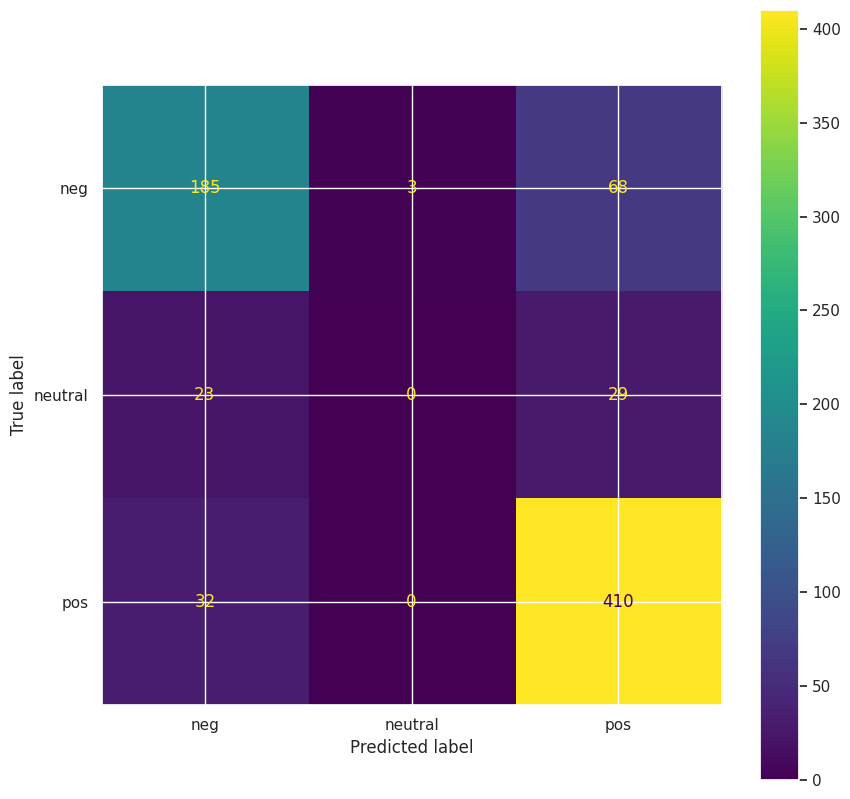

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
# Create confusion matrix
cm_LR = confusion_matrix(Y_test, lr_predicted)
# Print confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=model_LR.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# Evaluate the model
accuracy_LR = accuracy_score(Y_test, lr_predicted)
report_LR = classification_report(Y_test, lr_predicted)

print("Logistic Regression Accuracy:",accuracy_LR)
print("Logistic Regression Classification Report:\n", report_LR)

Logistic Regression Accuracy: 0.7933333333333333
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         neg       0.77      0.72      0.75       256
     neutral       0.00      0.00      0.00        52
         pos       0.81      0.93      0.86       442

    accuracy                           0.79       750
   macro avg       0.53      0.55      0.54       750
weighted avg       0.74      0.79      0.76       750



In [ ]:
model_output.to_csv('output.csv')

####Build and Evaluate Classifier model: **Naives Bayes**

In [ ]:
#build the classifier model - naives bayes
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB().fit(X_train, Y_train)
nb_predicted= model_nb.predict(X_test)
print("MultinomialNB Accuracy with TFIDF:",metrics.accuracy_score(Y_test, nb_predicted))

MultinomialNB Accuracy with TFIDF: 0.7013333333333334


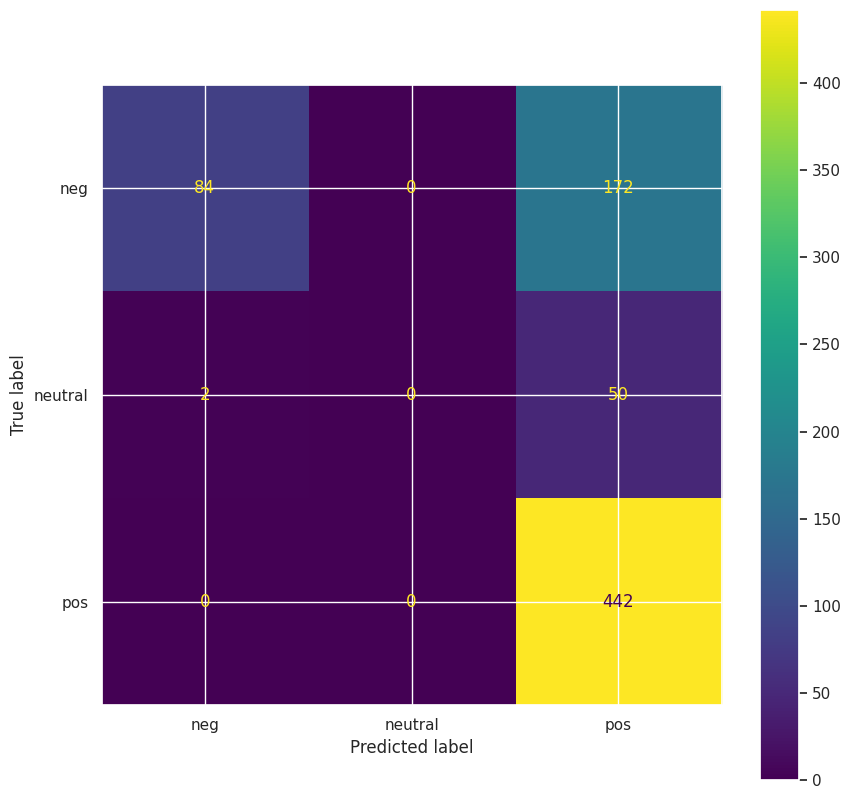

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
# Create confusion matrix
cm_nb = confusion_matrix(Y_test, nb_predicted)
# Print confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=model_nb.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# Evaluate the model
accuracy_nb = accuracy_score(Y_test, nb_predicted)
report_nb = classification_report(Y_test, nb_predicted)

print("Multinomial Naive Bayes Accuracy:",accuracy_nb)
print("Multinomial Naive Bayes Classification Report:\n", report_nb)

Multinomial Naive Bayes Accuracy: 0.7013333333333334
Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

         neg       0.98      0.33      0.49       256
     neutral       0.00      0.00      0.00        52
         pos       0.67      1.00      0.80       442

    accuracy                           0.70       750
   macro avg       0.55      0.44      0.43       750
weighted avg       0.73      0.70      0.64       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Perform a comparison between the results of the lexicon-based and the machine learning approaches.

Which approach yields better results? Make sure to add comments in your program accordingly.

###**Explanation:**

Based on the result for NLTK Vader,

* The model performs reasonably well for positive sentiment but struggles with negative and neutral sentiments.
* The low precision and recall for neutral sentiment indicate a significant challenge in correctly identifying neutral sentiment.

* Example: A negative statement: "Unfunny cringe.  A movie with no purpose and no sense of humor." is mislabelled to positive.


Based on the result for Logistic Regression,
* The model performs reasonably well, with high precision, recall, and F1-score for positive sentiment.
* For negative sentiment, the model achieves a good balance between precision and recall, resulting in a decent F1-score.
* The model struggles with predicting instances of neutral sentiment, as reflected in the very low precision, recall, and F1-score for this class.
* Example: A neutral review "Glad I only paid 4 to see it parts of it were funny and other parts were so unbelievably cheesy it was just dumb." is classified as negative.
Another neutral review: "Way more singing and songs than I expected-- felt like a musical.  cute but a bit cheesy and long. " is classified as positive.
* The overall accuracy is 79%, indicating the proportion of correctly predicted instances across all sentiment classes.

Based on the result for Naive Bayes,
* The Naive Bayes model performs extremely well in terms of precision for negative sentiment, indicating a high accuracy in predicting negative instances.
* However, the recall for negative sentiment is relatively low, suggesting that the model misses a significant portion of actual negative instances.
* Example: A negative sentence "I didn't really like the movie. Not worth the hype." is classified as positive by Naive Bayes.
* The model struggles with predicting instances of neutral sentiment, as reflected in the very low precision, recall, and F1-score for this class.
* For positive sentiment, the model achieves a good balance between precision and recall, resulting in a high F1-score.
* The overall accuracy is 70%, indicating the proportion of correctly predicted instances across all sentiment classes.

**Comparison:**

* Overall Accuracy:

    Logistic Regression (0.79) has the highest overall accuracy, followed by NLTK Vader and Naive Bayes (both at 0.70).
* Positive Sentiment:

    All three models perform reasonably well in identifying positive sentiment, with Logistic Regression having a slightly higher F1-score.


* Negative Sentiment:

    Naive Bayes has very high precision for negative sentiment, but Logistic Regression has a better balance between precision and recall.
    Neutral Sentiment:

    All models struggle with predicting neutral sentiment. NLTK Vader has the highest F1-score, but it is still relatively low.


**Conclusion:**

* The machine learning approaches (Naive Bayes and Logistic Regression) generally outperform the lexicon-based approach (NLTK Vader) in terms of overall accuracy.
* Logistic Regression tends to have the best overall performance among the three models, with a good balance between precision and recall for both positive and negative sentiments.
* The lexicon-based approach (NLTK Vader) may be useful for its simplicity and speed, but it seems less effective in capturing the nuances of sentiment compared to machine learning models.
* In summary, based on the provided metrics, the machine learning approaches, particularly Logistic Regression, appear to yield better results than the lexicon-based approach for the given sentiment analysis task.